<a href="https://colab.research.google.com/github/hackmashine/The-Road-to-Learning-ML-is-My-Story/blob/main/Research_on_the_influence_of_lambda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The Road to learning ML is my story**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# from sklearn.datasets import load_boston # Устарело
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:

n_samples, n_features = 506, 13 # Размер оригинального Boston Housing


X = np.random.randn(n_samples, n_features)


true_weights = np.random.randn(n_features)


noise = np.random.randn(n_samples) * 0.5 # Добавим шум
y = X @ true_weights + noise


feature_names = [f"feature_{i}" for i in range(n_features)]
data = pd.DataFrame(X, columns=feature_names)
data['target'] = y

print("Сгенерированный датасет (первые 5 строк):")
print(data.head())
print(f"\nРазмер датасета: {data.shape}")




Сгенерированный датасет (первые 5 строк):
   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0  -0.881256   0.105862  -1.796985  -1.332445  -1.043829   0.042087   
1   0.209902   1.982358   0.305331   0.447827   0.226545   1.052917   
2  -0.630424   1.443191   1.323030   0.700746  -0.771047   1.585758   
3   0.974810  -1.143188   0.391774  -0.269631  -0.366139   0.930505   
4   0.750269  -0.383140  -0.254410   0.209413   0.492448  -0.364143   

   feature_6  feature_7  feature_8  feature_9  feature_10  feature_11  \
0  -1.773120  -0.861122  -1.445170   1.055266    0.005863    1.416951   
1  -0.802571  -1.208450   1.146178   0.270834   -2.674278   -0.868783   
2  -1.424415   0.894524  -1.166956   0.658080    0.756337    1.066538   
3  -0.312085   1.504146   0.730186  -0.300442   -1.033954   -2.464330   
4  -0.262142  -0.286065  -1.682889  -0.067482   -1.391859    0.496991   

   feature_12    target  
0    0.153421  3.770505  
1   -0.507530  6.910352  
2   -1.072460 

In [ ]:

X = data.drop('target', axis=1).values
y = data['target'].values

# Разделение на обучающую и тестовую выборки (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Размер обучающей выборки: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Размер тестовой выборки: X_test = {X_test.shape}, y_test = {y_test.shape}")

Размер обучающей выборки: X_train = (404, 13), y_train = (404,)
Размер тестовой выборки: X_test = (102, 13), y_test = (102,)


In [ ]:
def manual_ridge_regression(X, y, lambda_reg):
    """
    Решает задачу линейной регрессии с L2 регуляризацией (Ridge) аналитически.

    Параметры:
    X : array-like, форма (n_samples, n_features)
        Матрица признаков.
    y : array-like, форма (n_samples,)
        Вектор целевой переменной.
    lambda_reg : float
        Параметр регуляризации (лямбда).

    Возвращает:
    w : ndarray, форма (n_features,)
        Вектор весов модели.
    """
    n_samples, n_features = X.shape


    X_with_bias = np.c_[np.ones((X.shape[0], 1)), X]
    n_features_with_bias = X_with_bias.shape[1]


    reg_matrix = lambda_reg * np.eye(n_features_with_bias)
    reg_matrix[0, 0] = 0

    try:

        A = X_with_bias.T @ X_with_bias + reg_matrix

        b = X_with_bias.T @ y

        w = np.linalg.solve(A, b)

        return w
    except np.linalg.LinAlgError:
        print(f"Ошибка: Матрица сингулярна при lambda={lambda_reg}. Используем псевдообратную матрицу.")
        A = X_with_bias.T @ X_with_bias + reg_matrix
        b = X_with_bias.T @ y
        w = np.linalg.pinv(A) @ b
        return w


def predict(X, w):
    """Делает предсказания по весам w."""
    X_with_bias = np.c_[np.ones((X.shape[0], 1)), X]
    return X_with_bias @ w


def rmse(y_true, y_pred):
    """Вычисляет корень среднеквадратичной ошибки."""
    return np.sqrt(mean_squared_error(y_true, y_pred))


In [ ]:

lambda_value = 1.0
print(f"\n--- Обучение своей модели Ridge (lambda={lambda_value}) ---")
w_manual = manual_ridge_regression(X_train, y_train, lambda_reg=lambda_value)
print(f"Веса (включая bias): {w_manual}")


y_pred_manual = predict(X_test, w_manual)

rmse_manual = rmse(y_test, y_pred_manual)
print(f"RMSE (своя модель, lambda={lambda_value}): {rmse_manual:.4f}")


print("\n--- Обучение стандартной модели sklearn LinearRegression (OLS, без регуляризации) ---")

lr_sklearn = LinearRegression()
lr_sklearn.fit(X_train, y_train)


y_pred_sklearn = lr_sklearn.predict(X_test)


rmse_sklearn = rmse(y_test, y_pred_sklearn)
print(f"RMSE (sklearn LinearRegression): {rmse_sklearn:.4f}")


print("\n--- Сравнение ---")
print(f"RMSE (своя модель, lambda={lambda_value}): {rmse_manual:.4f}")
print(f"RMSE (sklearn LinearRegression):       {rmse_sklearn:.4f}")
print(f"Разница RMSE: {abs(rmse_manual - rmse_sklearn):.4f}")




--- Обучение своей модели Ridge (lambda=1.0) ---
Веса (включая bias): [ 0.01934368  1.33004218  0.81627208  0.09687056 -0.00717356  0.20383116
  0.79524799 -1.19013047 -0.33498916 -0.79627814  1.44021357 -1.37409864
 -0.06841018  0.82928007]
RMSE (своя модель, lambda=1.0): 0.5605

--- Обучение стандартной модели sklearn LinearRegression (OLS, без регуляризации) ---
RMSE (sklearn LinearRegression): 0.5604

--- Сравнение ---
RMSE (своя модель, lambda=1.0): 0.5605
RMSE (sklearn LinearRegression):       0.5604
Разница RMSE: 0.0001



--- Исследование влияния lambda ---


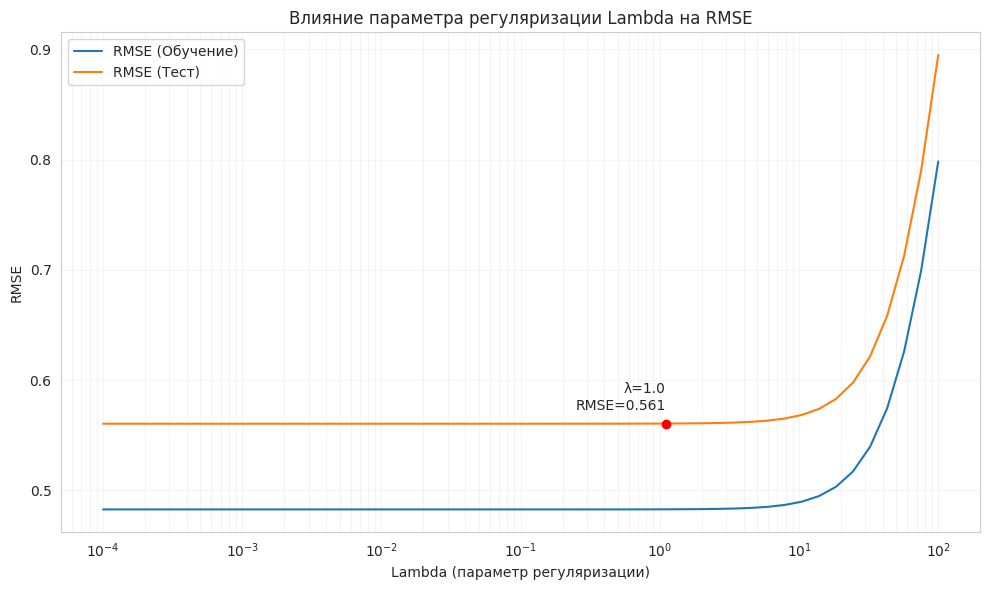


Лучшее значение lambda: 0.0001
Минимальный тестовый RMSE: 0.5604
RMSE (своя модель, лучший lambda=0.0001): 0.5604
RMSE (sklearn LinearRegression):                    0.5604


In [ ]:

print("\n--- Исследование влияния lambda ---")
lambdas = np.logspace(-4, 2, 50)
rmse_train_list = []
rmse_test_list = []

for l in lambdas:
    w = manual_ridge_regression(X_train, y_train, lambda_reg=l)
    y_pred_train = predict(X_train, w)
    y_pred_test = predict(X_test, w)
    rmse_train_list.append(rmse(y_train, y_pred_train))
    rmse_test_list.append(rmse(y_test, y_pred_test))


plt.figure(figsize=(10, 6))
plt.semilogx(lambdas, rmse_train_list, label='RMSE (Обучение)')
plt.semilogx(lambdas, rmse_test_list, label='RMSE (Тест)')
plt.xlabel('Lambda (параметр регуляризации)')
plt.ylabel('RMSE')
plt.title('Влияние параметра регуляризации Lambda на RMSE')
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.2)

idx_lambda_1 = np.argmin(np.abs(np.array(lambdas) - 1.0))
plt.scatter(lambdas[idx_lambda_1], rmse_test_list[idx_lambda_1], color='red', zorder=5)
plt.text(lambdas[idx_lambda_1], rmse_test_list[idx_lambda_1] + 0.01,
         f'λ=1.0\nRMSE={rmse_test_list[idx_lambda_1]:.3f}',
         horizontalalignment='right', verticalalignment='bottom')
plt.tight_layout()
plt.show()

#  lambda
best_idx = np.argmin(rmse_test_list)
best_lambda = lambdas[best_idx]
best_rmse = rmse_test_list[best_idx]
print(f"\nЛучшее значение lambda: {best_lambda:.4f}")
print(f"Минимальный тестовый RMSE: {best_rmse:.4f}")

# Сравним
w_best = manual_ridge_regression(X_train, y_train, lambda_reg=best_lambda)
y_pred_best = predict(X_test, w_best)
rmse_best_manual = rmse(y_test, y_pred_best)
print(f"RMSE (своя модель, лучший lambda={best_lambda:.4f}): {rmse_best_manual:.4f}")
print(f"RMSE (sklearn LinearRegression):                    {rmse_sklearn:.4f}")
